# Assignment 2 - Group project - Kaggle Challenge
Team members :
Gobu (vatan 😏 ) <br>
Aaron <br>
Bineeth <br>
Anns <br>
Dhanya <br>
Meenakshi<br>


## Library imports and function definitions

In [1]:
# Import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files


In [2]:
# set seaborn theme for plots
sns.set_theme(style="darkgrid")

## EDA

In [52]:
# Load data as a dataframe from our github organization
train_data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group-G/Kaggle-challenge-team-2/main/train.csv'
df = pd.read_csv(train_data)

test_data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group-G/Kaggle-challenge-team-2/main/test.csv'
test_df = pd.read_csv(test_data)
test_df2 = test_df.copy()

# Display first few rows
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [6]:
# Display more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# Analyse the data
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (8693, 14)


Transported
True     4378
False    4315
Name: count, dtype: int64


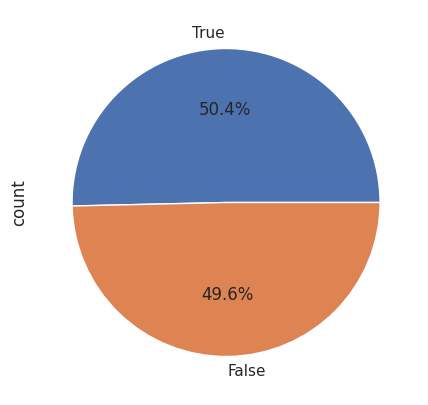

In [9]:
# Plot pie chart
plot_df = df.Transported.value_counts()
print(plot_df)

plot_df.plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5), title='')
plt.show()

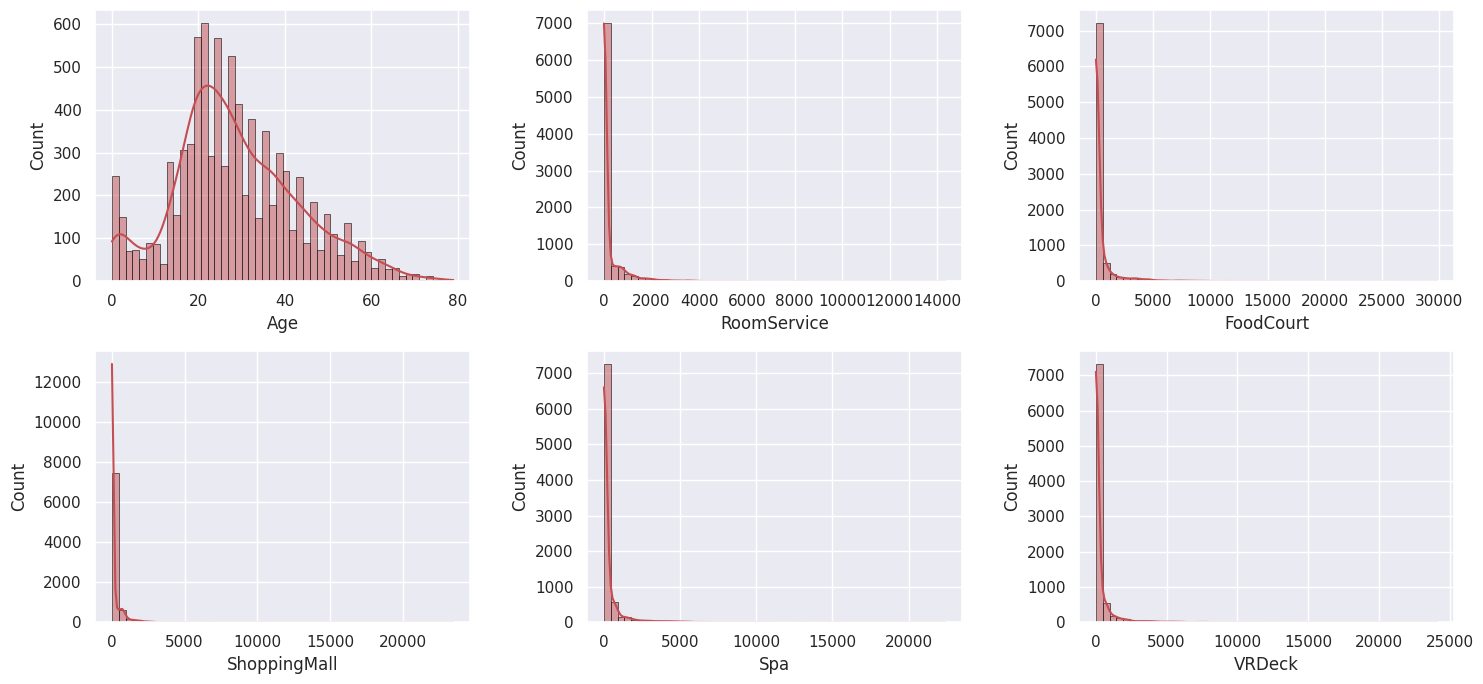

In [10]:
# Plot distribution of each numerical feature
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

sns.histplot(df['Age'], color='r', edgecolor='k', kde=True, bins=50,
             ax=ax[0, 0])
sns.histplot(df['RoomService'], color='r', edgecolor='k', kde=True, bins=50,
             ax=ax[0, 1])
sns.histplot(df['FoodCourt'], color='r', edgecolor='k', kde=True, bins=50,
             ax=ax[0, 2])
sns.histplot(df['ShoppingMall'], color='r', edgecolor='k', kde=True, bins=50,
             ax=ax[1, 0])
sns.histplot(df['Spa'], color='r', edgecolor='k', kde=True, bins=50,
             ax=ax[1, 1])
sns.histplot(df['VRDeck'], color='r', edgecolor='k', kde=True, bins=50,
             ax=ax[1, 2])

plt.tight_layout()
plt.show()

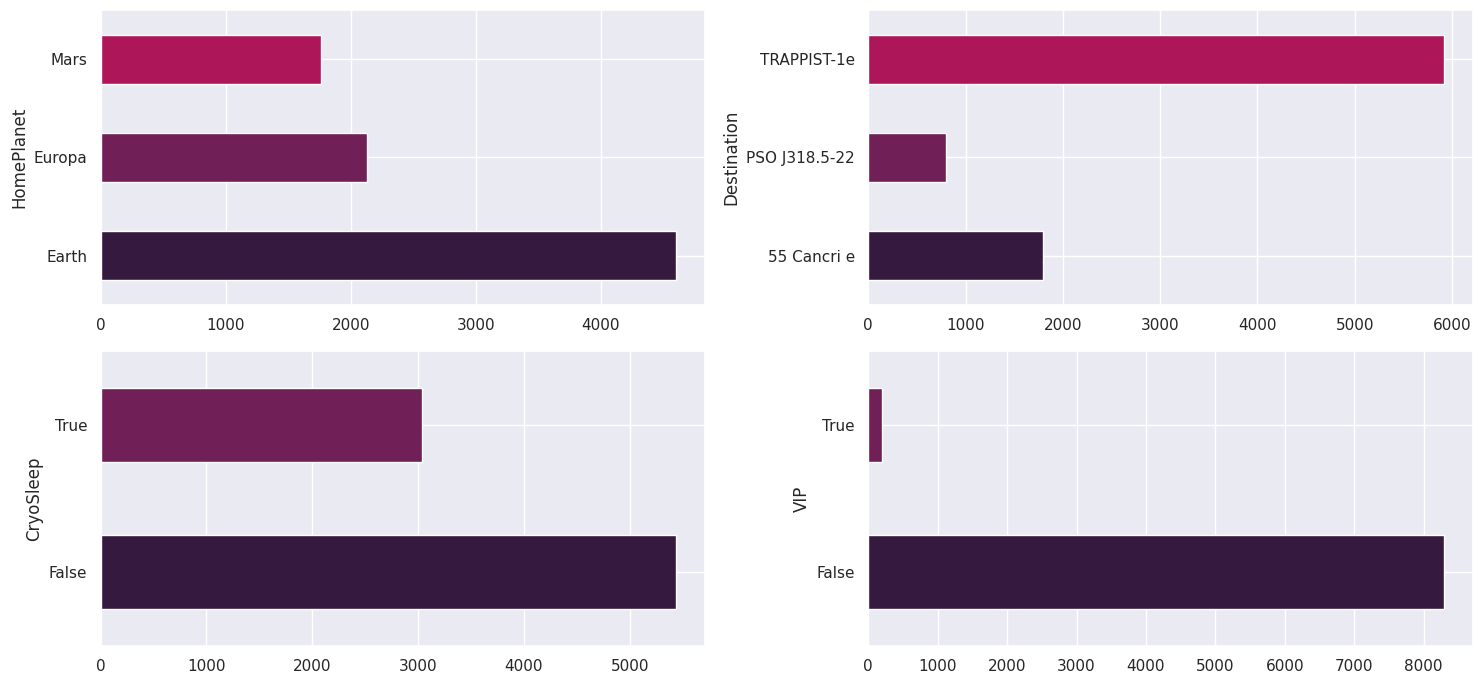

In [11]:
# Plot bar plot of each categorical feature
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

df.groupby('HomePlanet').size().plot(kind='barh',
                                     color=sns.palettes.mpl_palette('rocket'),
                                     ax=ax[0, 0])
df.groupby('Destination').size().plot(kind='barh',
                                      color=sns.palettes.mpl_palette('rocket'),
                                      ax=ax[0, 1])
df.groupby('CryoSleep').size().plot(kind='barh',
                                    color=sns.palettes.mpl_palette('rocket'),
                                    ax=ax[1, 0])
df.groupby('VIP').size().plot(kind='barh',
                              color=sns.palettes.mpl_palette('rocket'),
                              ax=ax[1, 1])

plt.tight_layout()
plt.show()

In [12]:
# plot a treemap with herirarchies 'Transported','HomePlanet' and 'Destination'
fig = px.treemap(df.dropna(axis=0),
                 path=['Transported','HomePlanet','Destination'],
                 color='Age')
fig.show()

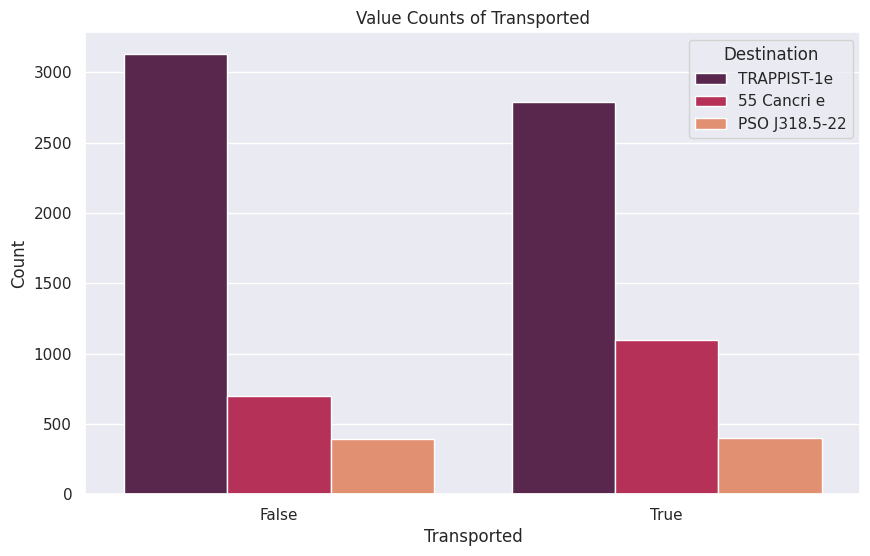

In [13]:
# Plot the value counts for transpotted
plt.figure(figsize=(10, 6))
sns.countplot(x='Transported', hue='Destination', data=df, palette='rocket')
plt.title('Value Counts of Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

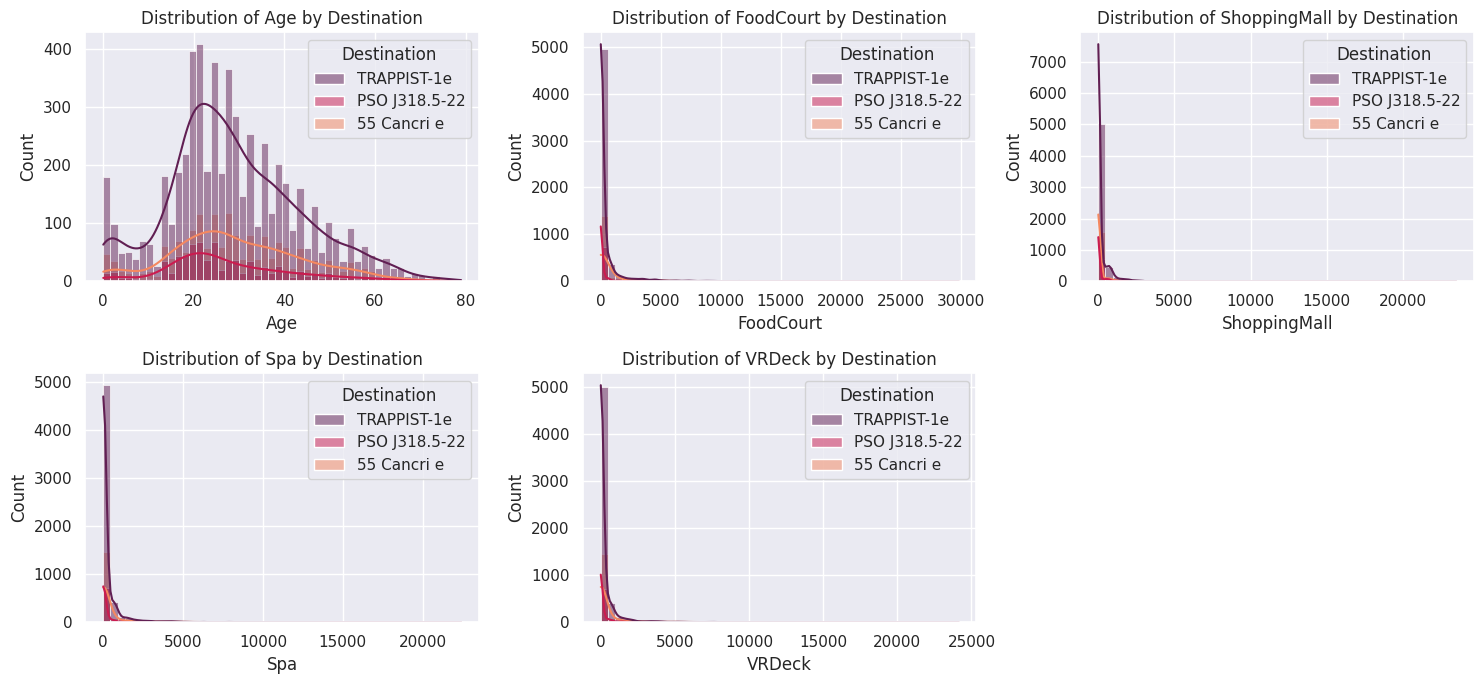

In [14]:
# creating distribution of numerical figures by destination
# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

# Plot histograms
sns.histplot(df, x='Age', hue='Destination', kde=True, palette='rocket',
             bins=50, ax=ax[0, 0])
sns.histplot(df, x='FoodCourt', hue='Destination', kde=True, palette='rocket',
             bins=50, ax=ax[0, 1])
sns.histplot(df, x='ShoppingMall', hue='Destination', kde=True,
             palette='rocket', bins=50, ax=ax[0, 2])
sns.histplot(df, x='Spa', hue='Destination', kde=True, palette='rocket',
             bins=50, ax=ax[1, 0])
sns.histplot(df, x='VRDeck', hue='Destination', kde=True, palette='rocket',
             bins=50, ax=ax[1, 1])
# Remove the sixth subplot
fig.delaxes(ax[1, 2])

# Set titles
ax[0, 0].set_title('Distribution of Age by Destination')
ax[0, 1].set_title('Distribution of FoodCourt by Destination')
ax[0, 2].set_title('Distribution of ShoppingMall by Destination')
ax[1, 0].set_title('Distribution of Spa by Destination')
ax[1, 1].set_title('Distribution of VRDeck by Destination')

plt.tight_layout()
plt.show()


In [15]:
# Preprocess the 'Cabin' column
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df.drop(columns=['Cabin'], inplace=True)

In [16]:
# same for
# Preprocess the 'Cabin' column
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [17]:
# plot a treemap with herirarchies 'Transported','Deck' and 'Side'
fig = px.treemap(df.dropna(axis=0), path=['Transported', 'Deck', 'Side'], color='Age')
fig.show()

In [18]:
df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Deck            199
Num             199
Side            199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [19]:
# Get the numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical features
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


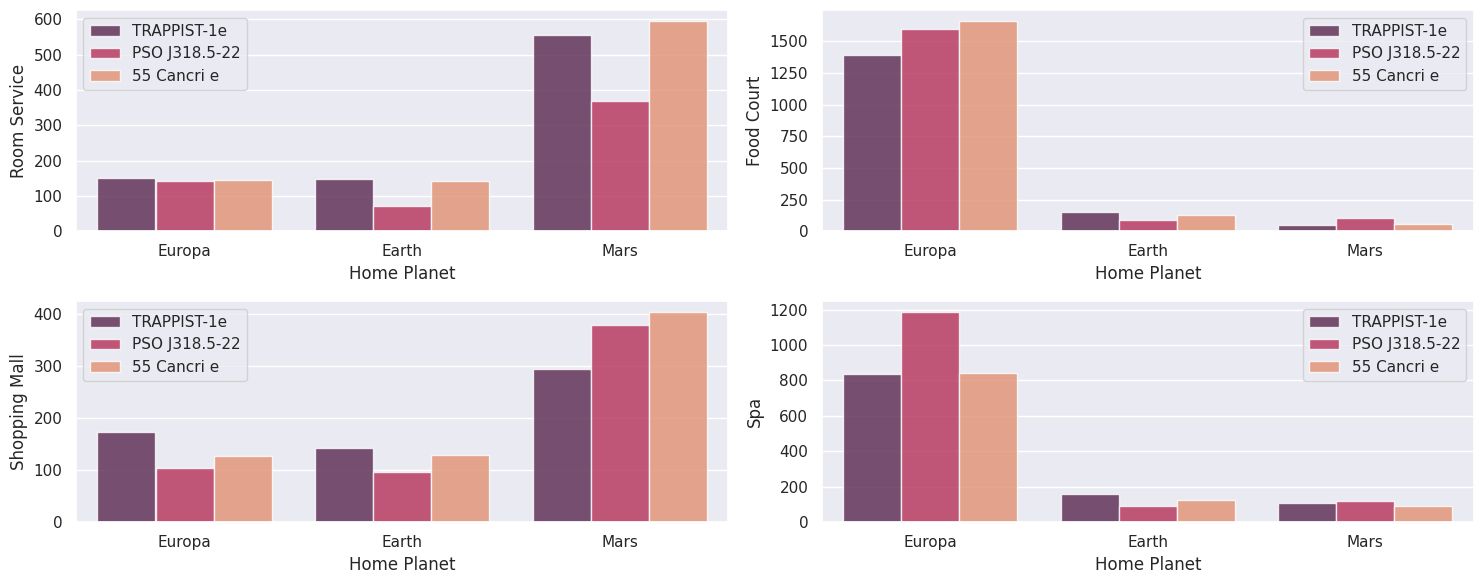

In [20]:
# plotting distribution of amenities value by homePlanet
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.barplot(
    data=df, x="HomePlanet", y="FoodCourt", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax=axes[0,1],
    )
sns.barplot(
    data=df, x="HomePlanet", y="RoomService", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax=axes[0, 0]
    )
sns.barplot(
    data=df,x="HomePlanet", y="ShoppingMall", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax=axes[1, 0]
    )
sns.barplot(
    data=df, x="HomePlanet", y="Spa", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax = axes[1,1]
    )
axes[0,0].legend(title="")
axes[0,1].legend(title="")
axes[1,0].legend(title="")
axes[1,1].legend(title="")
axes[0,0].set_xlabel("Home Planet")
axes[0,0].set_ylabel("Room Service")
axes[0,1].set_xlabel("Home Planet")
axes[0,1].set_ylabel("Food Court")
axes[1,0].set_xlabel("Home Planet")
axes[1,0].set_ylabel("Shopping Mall")
axes[1,1].set_xlabel("Home Planet")

plt.tight_layout()
plt.show()

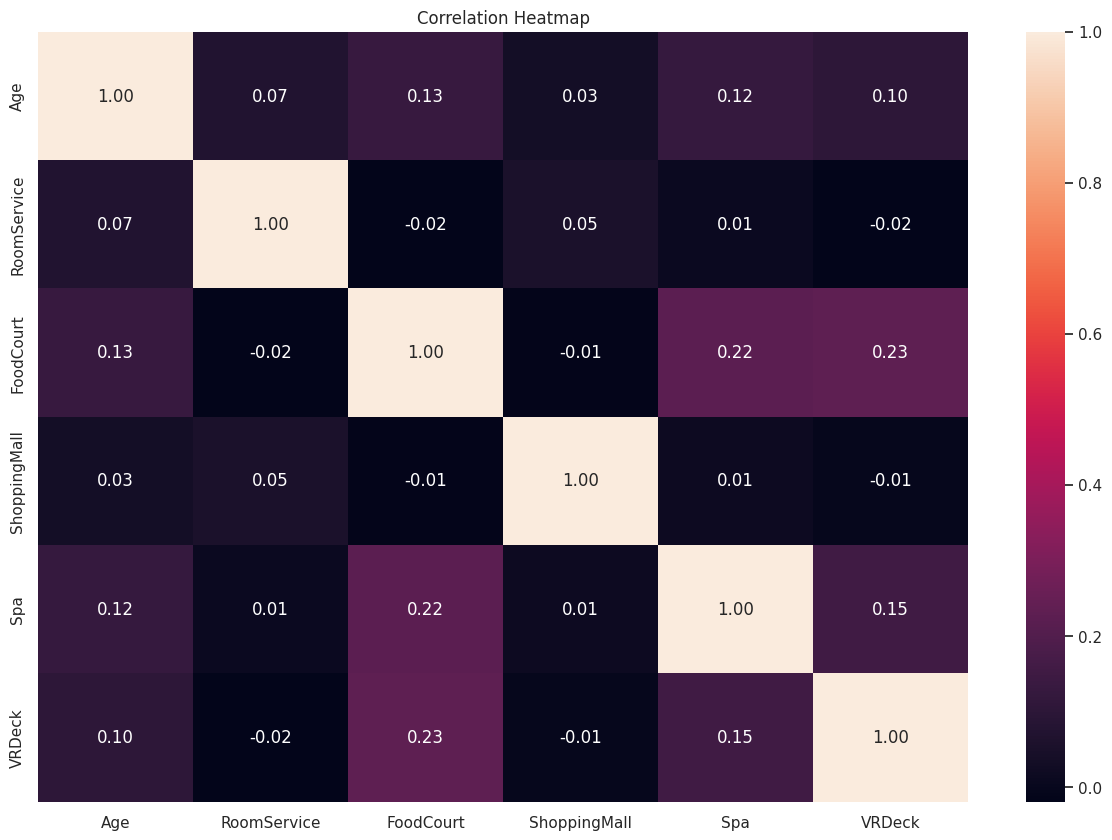

In [21]:
# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

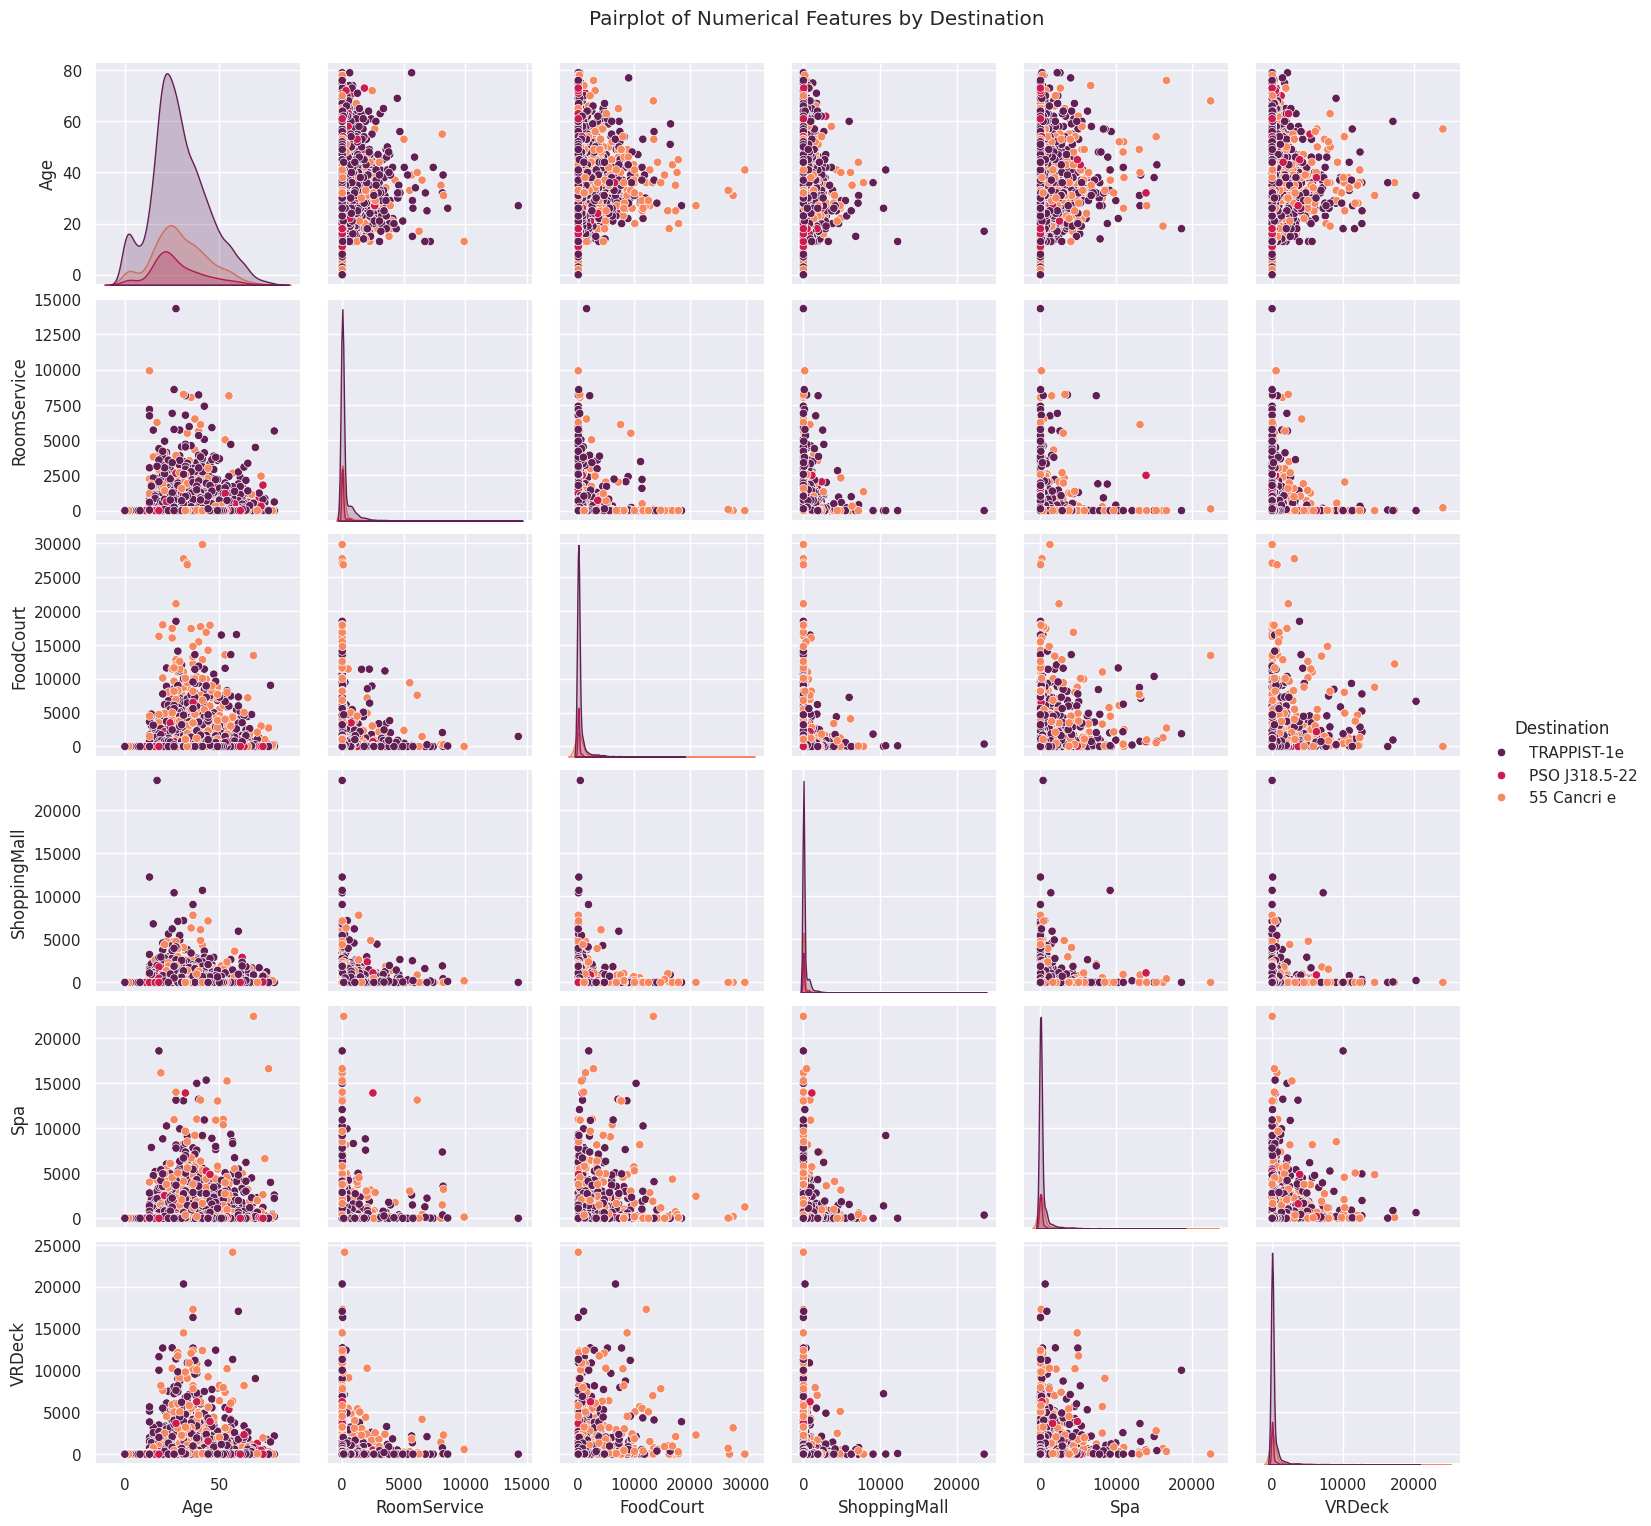

In [22]:
# Create a pairplot for numerical features with hue based on 'Destination'
sns.pairplot(df[numerical_features.tolist() + ['Destination']],
             hue='Destination', palette='rocket')
plt.suptitle('Pairplot of Numerical Features by Destination', y=1.02)
plt.show()

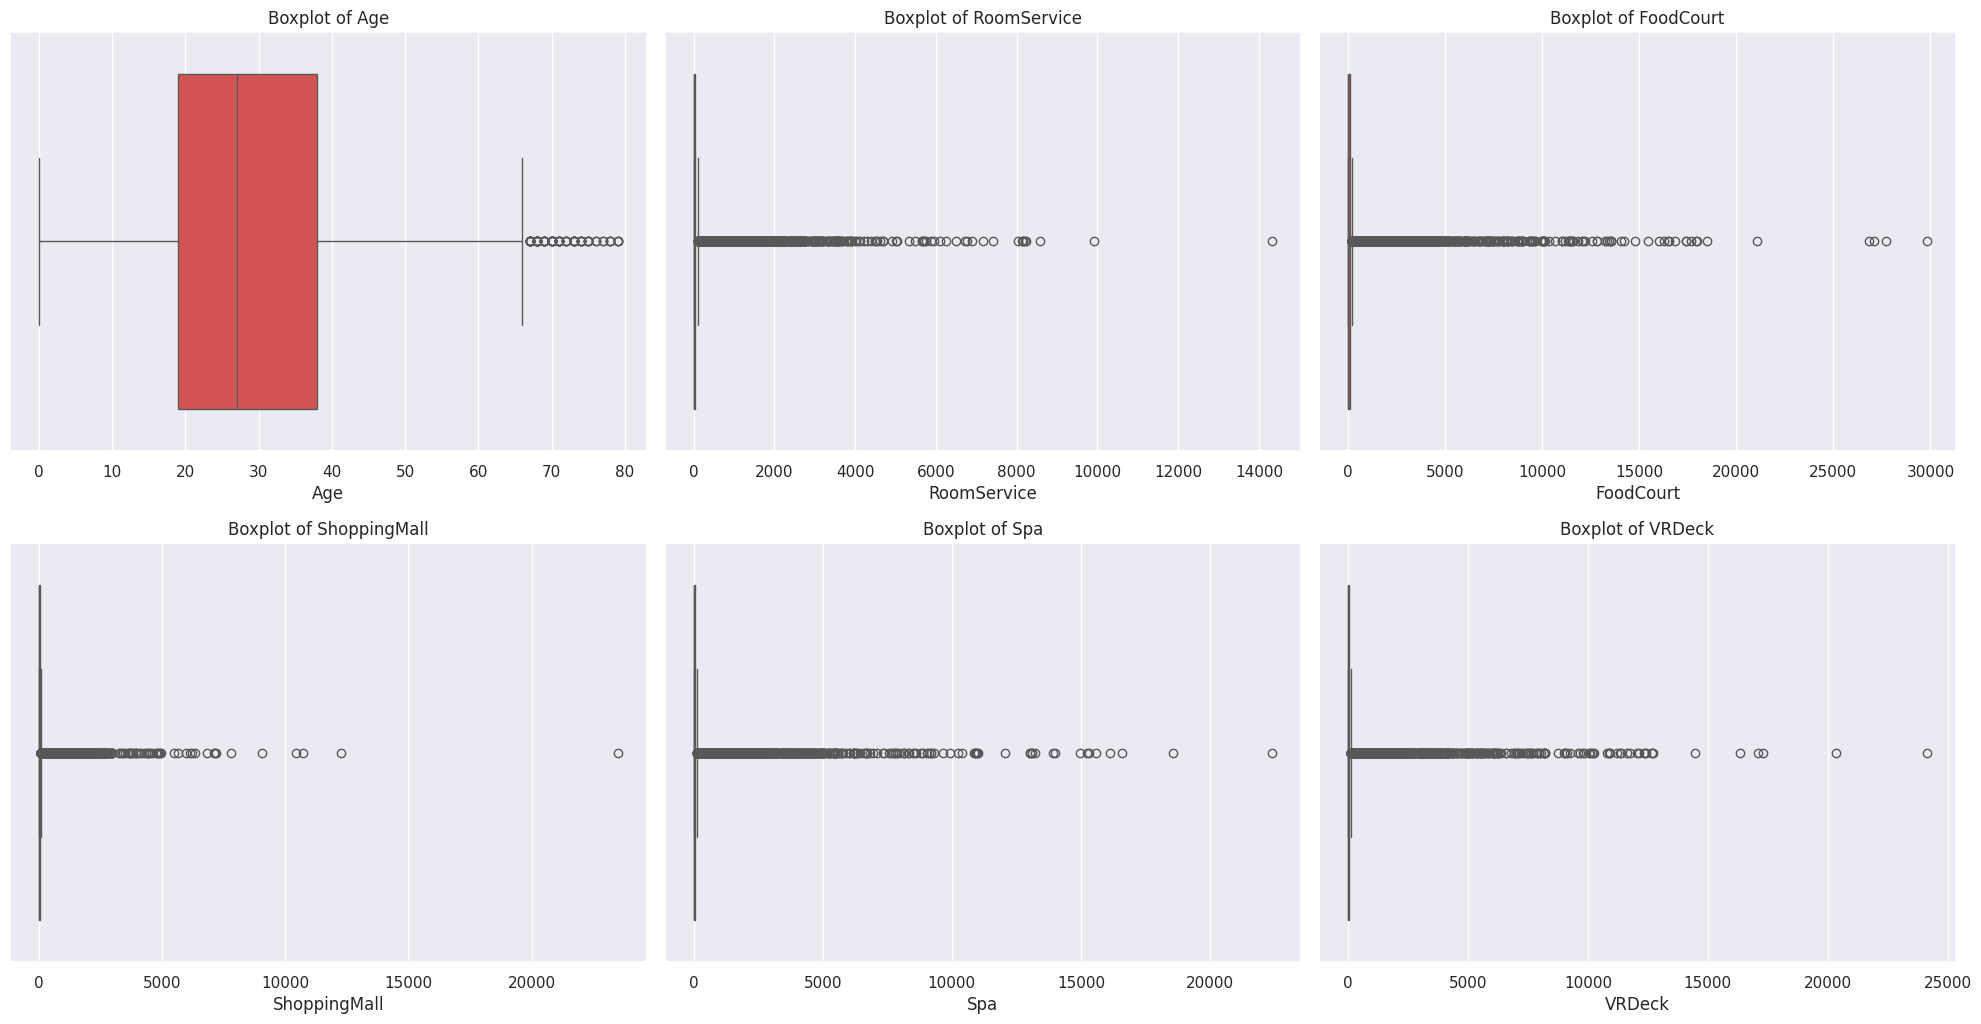

In [23]:
# plotting boxplots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df[col],
                color=sns.color_palette('rocket', as_cmap=True)(0.6))
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [24]:
# Display the number of unique values for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

print("Unique Values in Categorical Features:")
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Features:
PassengerId: 8693 unique values
HomePlanet: 3 unique values
CryoSleep: 2 unique values
Destination: 3 unique values
VIP: 2 unique values
Name: 8473 unique values
Deck: 8 unique values
Num: 1817 unique values
Side: 2 unique values


In [25]:
"""# plotting histograms by categorical features, stacked by destination
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.histplot(data=df, x=col, kde=True, hue="Destination",
                 palette='rocket', multiple='stack')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()"""

'# plotting histograms by categorical features, stacked by destination\nplt.figure(figsize=(20, 15))\nfor i, col in enumerate(categorical_features, 1):\n    plt.subplot(len(categorical_features), 1, i)\n    sns.histplot(data=df, x=col, kde=True, hue="Destination",\n                 palette=\'rocket\', multiple=\'stack\')\n    plt.title(f\'Distribution of {col}\')\n    plt.xlabel(col)\n    plt.ylabel(\'Count\')\nplt.tight_layout()\nplt.show()'

LOOP TAKING TOO MUCH TIME ?

In [26]:
# Convert categorical columns to category dtype
for col in categorical_features:
    df[col] = df[col].astype('category')

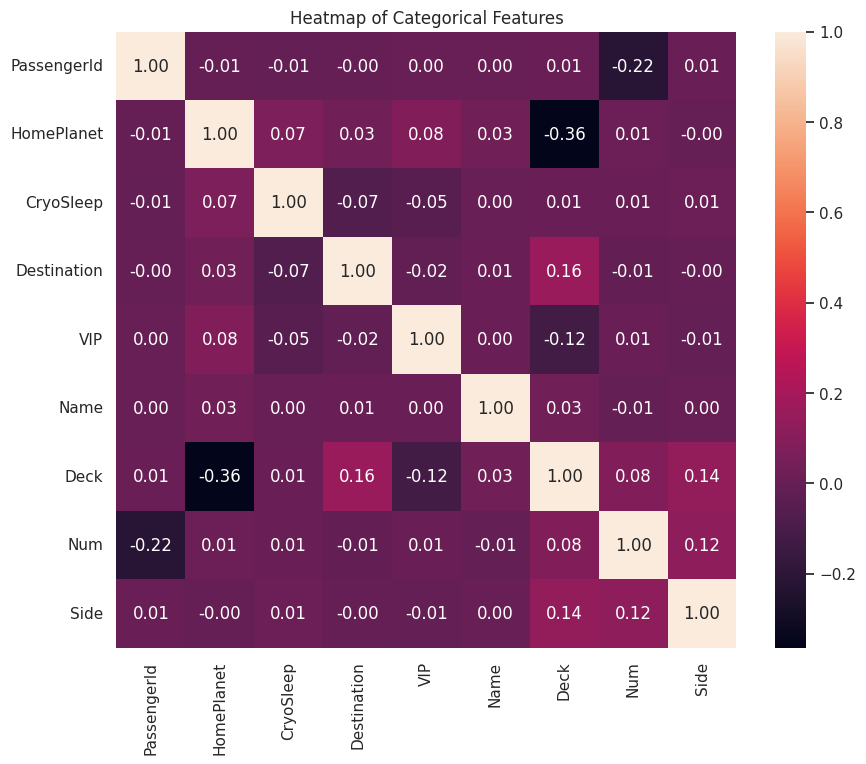

In [27]:
# Create a DataFrame with the counts of each combination of categories
heatmap_data = df[categorical_features].apply(lambda x: x.cat.codes)
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Heatmap of Categorical Features')
plt.show()

## Preprocessing

Dropping features. <br>

In [28]:
# Number of non-unique values in 'PassengerId' column
num_non_unique_passenger_id = df.shape[0] - df['PassengerId'].nunique()
print(f"Number of non-unique values in 'PassengerId' column: {num_non_unique_passenger_id}")

# Number of non-unique values in 'Name' column
num_non_unique_name = df.shape[0] - df['Name'].nunique()
print(f"Number of non-unique values in 'Name' column: {num_non_unique_name}")

# Find non-unique names
non_unique_names = df[df.duplicated(subset=['Name'], keep=False)]['Name'].unique()

# Display non-unique names
print("Non-unique names:")
print(non_unique_names)

Number of non-unique values in 'PassengerId' column: 0
Number of non-unique values in 'Name' column: 220
Non-unique names:
[NaN, 'Elaney Webstephrey', 'Keitha Josey', 'Ankalik Nateansive', 'Gollux Reedall', ..., 'Carry Contrevins', 'Asch Stradick', 'Cuses Pread', 'Alraium Disivering', 'Glena Hahnstonsen']
Length: 21
Categories (8473, object): ['Aard Curle', 'Aarjel Jaff', 'Aarjel Rhuba', 'Aark Ches', ...,
                            'Zosmas Ineedeve', 'Zosmas Mormonized', 'Zubeneb Flesping',
                            'Zubeneb Pasharne']


The 'PassengerId' feature is unique for each record and 'Name' column only has 220 non unique entries. Thus these 2 features are irrelevant for our prediction and can be dropped.

In [29]:
# Drop 'Name' and 'PassengerId' columns
df = df.drop(['Name', 'PassengerId'], axis=1)
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [30]:
# same for test file
# Drop 'Name' and 'PassengerId' columns
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
test_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side'],
      dtype='object')

Encoding

In [31]:
# Convert boolean columns to integers
boolean_columns = ['CryoSleep', 'Transported']
df[boolean_columns] = df[boolean_columns].fillna(False).astype(int)
# Define categorical features to be one-hot encoded
categorical_features = ['HomePlanet', 'Destination', 'VIP', 'Deck', 'Side']
# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, prefix=categorical_features, dtype=int)
df.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,303.0,70.0,151.0,565.0,2.0,1,1,1,...,0,0,0,0,0,1,0,0,0,1


In [32]:
# same for test_df
# Convert boolean columns to integers
boolean_columns = ['CryoSleep']
test_df[boolean_columns] = test_df[boolean_columns].fillna(False).astype(int)
# Define categorical features to be one-hot encoded
categorical_features = ['HomePlanet', 'Destination', 'VIP', 'Deck', 'Side']
# Apply one-hot encoding
test_df = pd.get_dummies(test_df, columns=categorical_features, prefix=categorical_features, dtype=int)
test_df.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,27.0,0.0,0.0,0.0,0.0,0.0,3,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,19.0,0.0,9.0,0.0,2823.0,0.0,4,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,31.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,20.0,10.0,0.0,635.0,0.0,0.0,5,1,0,...,0,0,0,0,0,1,0,0,0,1


SCALING

In [33]:
# Import StandardScaler for scaling
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Display the first few rows of the scaled DataFrame
df.head()
"""# Import MinMaxScaler for scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled DataFrame
df.head()"""

'# Import MinMaxScaler for scaling\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Initialize the scaler\nscaler = MinMaxScaler()\n\n# Scale numerical features\ndf[numerical_features] = scaler.fit_transform(df[numerical_features])\n\n# Display the first few rows of the scaled DataFrame\ndf.head()'

In [34]:
# same for test file
# Import StandardScaler for scaling
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Scale numerical features
test_df[numerical_features] = scaler.fit_transform(test_df[numerical_features])

IMPUTING

In [35]:
# Checking for missing values again
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Imputing missing values
# For numerical columns, we can use the median for imputation
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Verify if there are still any missing values in numerical columns
print("Missing values after imputing numerical columns:")
print(df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() > 0])

# For categorical columns, we can use the most frequent value for imputation
categorical_columns = df.select_dtypes(include=['category']).columns

for col in categorical_columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

# Verify if there are still any missing values in categorical columns
print("Missing values after imputing categorical columns:")
print(df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() > 0])

# Final check to ensure no missing values are left
print("Final check for missing values in the entire dataframe:")
print(df.isnull().sum().sum())

# Let's see the final shape of the dataset
print(f"Final dataset shape is: {df.shape}")


Missing values in each column:
ShoppingMall    208
Num             199
VRDeck          188
FoodCourt       183
Spa             183
RoomService     181
Age             179
dtype: int64
Missing values after imputing numerical columns:
Num    199
dtype: int64
Missing values after imputing categorical columns:
Series([], dtype: int64)
Final check for missing values in the entire dataframe:
0
Final dataset shape is: (8693, 27)


##XGBoost classifier

In [36]:
df_xgb = df.copy()

In [37]:
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CryoSleep                  8693 non-null   int64   
 1   Age                        8693 non-null   float64 
 2   RoomService                8693 non-null   float64 
 3   FoodCourt                  8693 non-null   float64 
 4   ShoppingMall               8693 non-null   float64 
 5   Spa                        8693 non-null   float64 
 6   VRDeck                     8693 non-null   float64 
 7   Transported                8693 non-null   int64   
 8   Num                        8693 non-null   category
 9   HomePlanet_Earth           8693 non-null   int64   
 10  HomePlanet_Europa          8693 non-null   int64   
 11  HomePlanet_Mars            8693 non-null   int64   
 12  Destination_55 Cancri e    8693 non-null   int64   
 13  Destination_PSO J318.5-22  8693 n

In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4186 non-null   float64
 2   RoomService                4195 non-null   float64
 3   FoodCourt                  4171 non-null   float64
 4   ShoppingMall               4179 non-null   float64
 5   Spa                        4176 non-null   float64
 6   VRDeck                     4197 non-null   float64
 7   Num                        4177 non-null   object 
 8   HomePlanet_Earth           4277 non-null   int64  
 9   HomePlanet_Europa          4277 non-null   int64  
 10  HomePlanet_Mars            4277 non-null   int64  
 11  Destination_55 Cancri e    4277 non-null   int64  
 12  Destination_PSO J318.5-22  4277 non-null   int64  
 13  Destination_TRAPPIST-1e    4277 non-null   int64

In [38]:
X = df_xgb.drop(['Transported', 'Num'], axis=1)
y = df_xgb['Transported']

In [39]:
# splitting data for training
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=69)

In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Create an XGBoost classifier
modelxgb = xgb.XGBClassifier(random_state=45, use_label_encoder=False,
                             eval_metric='logloss')

# Train the model4 on the training data
modelxgb.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_xgb = modelxgb.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))

Accuracy: 0.7975848188614146
Confusion Matrix:
[[665 200]
 [152 722]]


In [48]:
# tesing on test file
# Make predictions on the test file
test_df1 = test_df.drop(['Num'], axis=1)
y_pred_xgb_test = modelxgb.predict(test_df1)

In [53]:
# creating file for submission
# Prepare the Kaggle submission file
submission_xgb = pd.DataFrame({'PassengerId': test_df2['PassengerId'],
                               'Transported': y_pred_xgb_test})

# Convert 0s and 1s to "False" and "True"
submission_xgb.replace({0: False, 1: True}, inplace=True)

# Write the dataFrame to a .csv file
submission_xgb.to_csv('submission_Test_xgb.csv', index=False)

# Download the .csv file
files.download("submission_Test_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>